###Lukas Mosser

In [1]:
import numpy as np
from math import factorial
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import kn
%matplotlib inline

##Computation of Stehfest Coefficients

In [2]:
stehfest_coeffs = np.zeros((19, len(range(2, 20, 2))))
for N_col, N in enumerate(range(2, 20, 2)):
    for i_col, i in enumerate(range(1, N+1)):
        V_i = 0.
        for k in range(int(np.floor((i+1)/2.)), int(min(i, N/2.))+1):
            V_i += (np.power(k, N/2.)*factorial(2*k))/(factorial(N/2.-k)*factorial(k)*factorial(k-1)*factorial(i-k)*factorial(2*k-i))
        V_i *= np.power(-1, N/2.+i)
        stehfest_coeffs[i_col][N_col] = V_i

data = pd.DataFrame(stehfest_coeffs)

See results assignement 1

##Inversion of Gringarten et. al. type curve:

$$\widetilde{P_{D}}(C_{D}, S, s')=\frac{1}{s'[s'+\frac{1}{ln\frac{2}{\gamma \sqrt{\frac{s'}{C_{D}e^{2Skin}}}}}]}$$
$$s'=sC_{D}$$

Using the given Gaver-Stehfest algorithm the required expanded to:
$$P_{D}(C_{D}e^{2Skin}, \frac{t_{D}}{C_{D}}) = \frac{ln(2)C_{D}}{t_{D}}\sum\limits_{i=1}^N V_{i} \frac{1}{i\frac{ln2 C_{D}}{t_{D}}[i\frac{ln2 C_{D}}{t_{D}}+\frac{1}{ln\frac{2}{\gamma \sqrt{\frac{i\frac{ln2 C_{D}}{t_{D}}}{C_{D}e^{2Skin}}}}}]}$$

In [3]:
def gringarten_type_curve(i, tD_CD, CD_e_skin):
    s_dash = i*np.log(2)*1/tD_CD
    return 1/(s_dash*(s_dash+(1/(np.log(2./(1.781*np.sqrt(s_dash/CD_e_skin)))))))

In [4]:
val = 0.
tD_CDs = np.array([1e-1, 2e-1, 3e-1, 4e-1, 6e-1, 8e-1,
                       1e0, 2e0, 3e0, 4e0, 6e0, 8e0,
                       1e1, 2e1, 3e1, 4e1, 6e1, 8e1,
                       1e2, 2e2, 3e2, 4e2, 6e2, 8e2,
                       1e3, 2e3, 3e3, 4e3, 6e3, 8e3,
                       1e4])

CD_e_skins = [5, 1e2, 1e4, 1e8, 1e15, 1e30]

N = 10
N_index = 4

inversion = np.zeros((len(tD_CDs), len(CD_e_skins)+1))
inversion[:,0] = tD_CDs
for inv_index, CD_e_skin in enumerate(CD_e_skins):
    pD = []
    for k, tD_CD in enumerate(tD_CDs):
        val = 0.
        for i in range(N):
            val += stehfest_coeffs[i][N_index]*gringarten_type_curve(i+1, tD_CD, CD_e_skin)
        val *= np.log(2)*1/tD_CD
        inversion[k][inv_index+1] = val
#print inversion

##Plot of Gringarten type curve on log-log plot and semi-log approximation

$$\frac{t_{D}}{C_{D}} \ in \ range \ [1e-1 \ , \ 1e4] \ (6 \ points \ per \ log-cycle)$$
$$C_{D}e^{2Skin}=[5, 1e2, 1e4, 1e8, 1e15, 1e30]$$
The semi-log approximations is given as:
$$P_{D}=0.5(ln\frac{t_{D}}{C_{D}}+0.80907+lnC_{D}e^{2s})$$
We plot the locus of the start of the semi-log radial flow approximation using the method given by Ramey et. al.:
$$\frac{t_{D}}{C_{D}} = 0.048logC_{D}e^{2S}-0.03$$ 

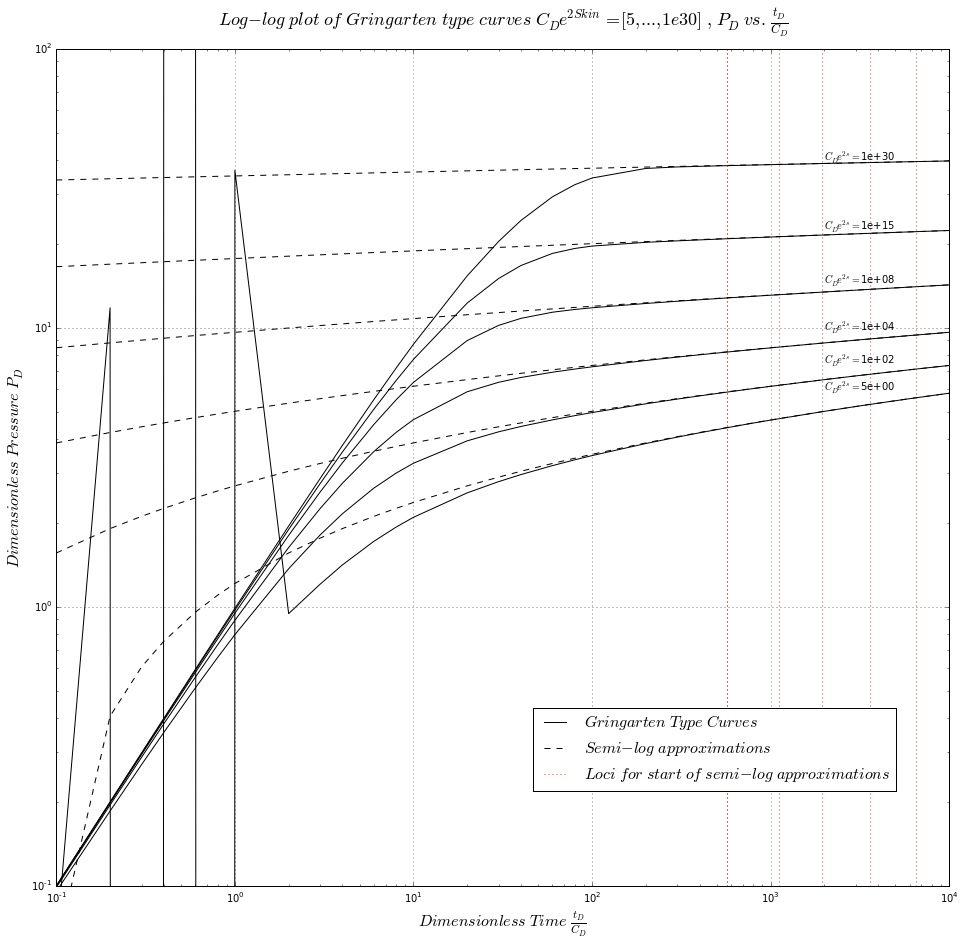

In [5]:
fig, ax = plt.subplots(figsize=(16,15))

ax.set_xscale('log', basex=10)
ax.set_yscale('log', basey=10)
ax.set_xlim(left=1e-1,right=10000.0)
ax.set_ylim(bottom=1e-1, top=1e2)

ax.set_title(r'$Log-log \ plot \ of \ Gringarten \ type \ curves \ C_{D}e^{2Skin}=[5,..., 1e30] \ , \ P_{D} \ vs. \ \frac{t_{D}}{C_{D}}$', fontsize=18, y=1.02)

ax.set_xlabel(r'$Dimensionless \ Time \ \frac{t_{D}}{C_{D}}$', fontsize=16)
ax.set_ylabel(r'$Dimensionless \ Pressure \ P_{D}$', fontsize=16)

locus_storage_ratios = 0.048*np.log(CD_e_skins)-0.03
locus_semilog_ratios = 280+180*np.log(CD_e_skins)

for i, CD_e_skin, linest, desc, semilog_time in zip(range(1, len(CD_e_skins)+1), CD_e_skins,['-', '-', '-', '-', '-', '-'], ['5', '1e+2', '1e+4', '1e+8', '1e+15','1e+30'], locus_semilog_ratios):
    if i==1:
        ax.plot(inversion[:, 0], inversion[:, i], 
            color="black", linestyle=linest, label='$Gringarten \ Type \ Curves$')
    else:
        ax.plot(inversion[:, 0], inversion[:, i], color="black", linestyle=linest)
                
    plt.text(2000, inversion[-1, i]+0.1, r'$C_{D}e^{2s}=$'+'{:.0e}'.format(CD_e_skin), fontsize=10)
    if i==1:
        ax.plot(tD_CDs, 0.5*(np.log(tD_CDs)+0.80907+np.log(CD_e_skin)), color="black", label='$Semi-log \ approximations$',
                    linestyle='--')
        ax.axvline(semilog_time, alpha=0.8, linestyle=":", color="red", label='$Loci \ for \ start \ of \ semi-log \ approximations$')
    else:
        ax.plot(tD_CDs, 0.5*(np.log(tD_CDs)+0.80907+np.log(CD_e_skin)), color="black",
            linestyle='--')
    ax.axvline(semilog_time, alpha=0.8, linestyle=":", color="red")

plt.grid()
legend = plt.legend(bbox_to_anchor=(0., 0.12, 0.95, .102), fontsize=16)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
plt.show()

We recognise the instability for $C_{D}e^{2s}=5$ and will use the agarwal type curve to represn't this curves early time behavior.
The loci of the start 

##Inversion of Agarwal et. al. type curve:

$$\widetilde{P_{D}}(C_{D}, S, s)=\frac{K_{0}(\sqrt{s})+S\sqrt{s}K_{1}(\sqrt{s})}{s(\sqrt{s}K_{1}(\sqrt{s})+sC_{D}[K_{0}(\sqrt{s})+S\sqrt{s}K_{1}(\sqrt{s})])}$$

Using the given Gaver-Stehfest algorithm the required expanded to:
$$P_{D}(C_{D}, t_{D}) = \frac{ln(2)}{t_{D}}\sum\limits_{i=1}^N V_{i}\frac{K_{0}(\sqrt{i \frac{ln(2)}{t_{D}}})+S\sqrt{i \frac{ln(2)}{t_{D}}}K_{1}(\sqrt{i \frac{ln(2)}{t_{D}}})}{i \frac{ln(2)}{t_{D}}(\sqrt{i \frac{ln(2)}{t_{D}}}K_{1}(\sqrt{i \frac{ln(2)}{t_{D}}})+i \frac{ln(2)}{t_{D}}C_{D}[K_{0}(\sqrt{i \frac{ln(2)}{t_{D}}})+S\sqrt{i \frac{ln(2)}{t_{D}}}K_{1}(\sqrt{i \frac{ln(2)}{t_{D}}})])} $$

We set $C_{D}=1$ and solve $5 = C_{D}e^{2s}$ for s, leading to $S=\frac{ln5}{2}$

In [6]:
def agarwal_type_curve(i, CD, tD, skin):
    s = i*np.log(2)/tD
    sqrt_s = np.sqrt(s)
    k0 = kn(0, sqrt_s)
    k1 = kn(1, sqrt_s)
    return (k0+skin*sqrt_s*k1)/(s*(sqrt_s*k1+s*CD*(k0+skin*sqrt_s*k1)))

In [7]:
val = 0.
tD_CD = np.array([1e-1, 2e-1, 3e-1, 4e-1, 6e-1, 8e-1,
                       1e0, 2e0, 3e0, 4e0, 6e0, 8e0,
                       1e1, 2e1, 3e1, 4e1, 6e1, 8e1,
                       1e2, 2e2, 3e2, 4e2, 6e2, 8e2,
                       1e3, 2e3, 3e3, 4e3, 6e3, 8e3,
                       1e4])

CD_vals = [1.]
S_vals = [np.log(5)/2.]
N = 10
N_index = 4

agar_inversion = np.zeros((len(tD_CD), len(CD_vals)+1))
agar_inversion[:,0] = tD_CD
for inv_index, (CD, S) in enumerate(zip(CD_vals, S_vals)):
    pD = []
    tDs = np.multiply(tD_CD, CD)
    for k, tD in enumerate(tDs):
        val = 0.
        for i in range(N+1):
            val += stehfest_coeffs[i][N_index]*agarwal_type_curve(i+1, CD, tD, S)
        val *= np.log(2)/tD
        agar_inversion[k][inv_index+1] = val
#print agar_inversion

##Plot of Gringarten type curve on log-log plot and semi-log approximation including agarwal solution for $C_{D}e^{2s}=5$ to correct instability in type curve computation

$$\frac{t_{D}}{C_{D}} \ in \ range \ [1e-1 \ , \ 1e4] \ (6 \ points \ per \ log-cycle)$$
$$C_{D}e^{2Skin}=[5, 1e2, 1e4, 1e8, 1e15, 1e30]$$
The semi-log approximations is given as:
$$P_{D}=0.5(ln\frac{t_{D}}{C_{D}}+0.80907+lnC_{D}e^{2s})$$
We include the Agarwal et. al. solution for $C_{D}=1$ and $Skin=\frac{ln5}{2}$

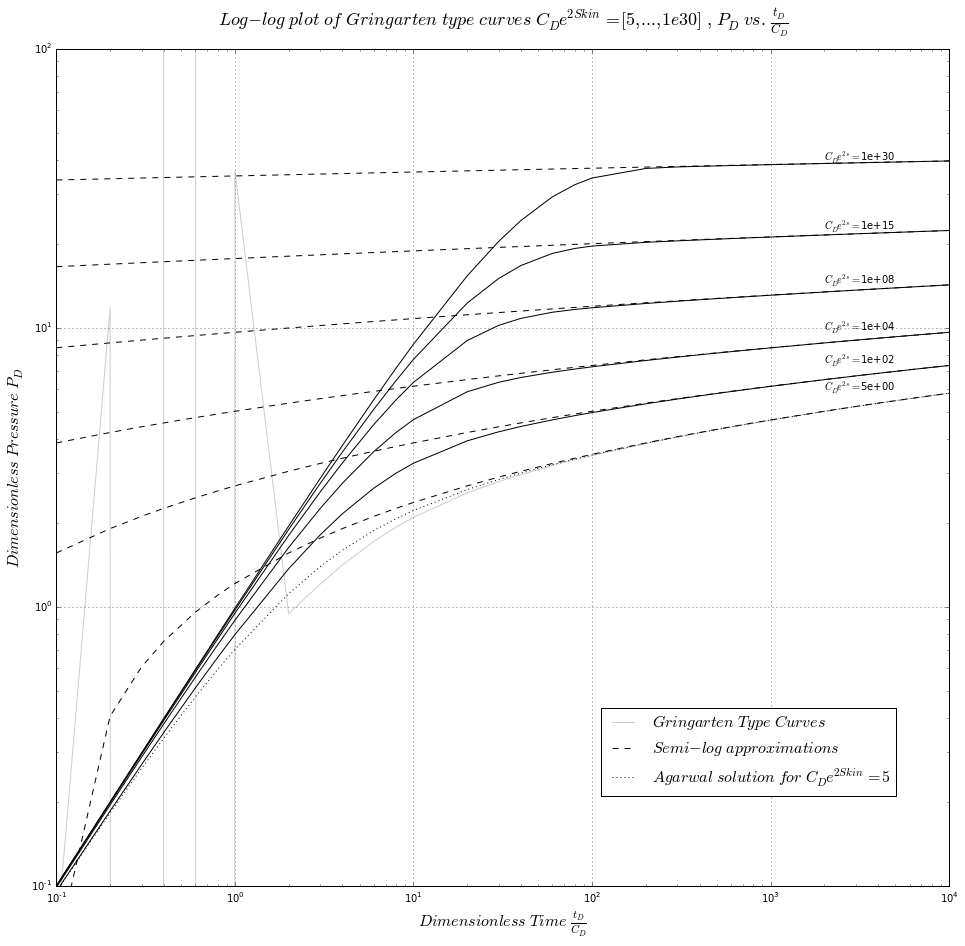

In [8]:
fig, ax = plt.subplots(figsize=(16,15))

ax.set_xscale('log', basex=10)
ax.set_yscale('log', basey=10)
ax.set_xlim(left=1e-1,right=10000.0)
ax.set_ylim(bottom=1e-1, top=1e2)

ax.set_title(r'$Log-log \ plot \ of \ Gringarten \ type \ curves \ C_{D}e^{2Skin}=[5,..., 1e30] \ , \ P_{D} \ vs. \ \frac{t_{D}}{C_{D}}$', fontsize=18, y=1.02)

ax.set_xlabel(r'$Dimensionless \ Time \ \frac{t_{D}}{C_{D}}$', fontsize=16)
ax.set_ylabel(r'$Dimensionless \ Pressure \ P_{D}$', fontsize=16)

for i, CD_e_skin, linest, desc, alpha in zip(range(1, len(CD_e_skins)+1), CD_e_skins, 
                                ['-', '-', '-', '-', '-', '-'], ['5', '1e+2', '1e+4', '1e+8', '1e+15','1e+30'],
                                [0.2, 1.0, 1.0, 1.0, 1.0, 1.0]):
    if i==1:
        ax.plot(inversion[:, 0], inversion[:, i], 
            color="black", linestyle=linest, label='$Gringarten \ Type \ Curves$', alpha=alpha)
    else:
        ax.plot(inversion[:, 0], inversion[:, i], color="black", linestyle=linest, alpha=alpha)
    plt.text(2000, inversion[-1, i]+0.1, r'$C_{D}e^{2s}=$'+'{:.0e}'.format(CD_e_skin), fontsize=10)
    if i==1:
        ax.plot(tD_CDs, 0.5*(np.log(tD_CDs)+0.80907+np.log(CD_e_skin)), color="black", label='$Semi-log \ approximations$',
                    linestyle='--')
    else:
        ax.plot(tD_CDs, 0.5*(np.log(tD_CDs)+0.80907+np.log(CD_e_skin)), color="black",
            linestyle='--')
ax.plot(agar_inversion[:, 0], agar_inversion[:, 1], color="black", label='$Agarwal \ solution \ for \ C_{D}e^{2Skin}=5$',
            linestyle=':')
plt.grid()
legend = plt.legend(bbox_to_anchor=(0., 0.12, 0.95, .102), fontsize=16)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
plt.show()

We have used the agarwal solution to substitute for the instability at $C_{D}e^{2s}=5$

##Inversion of Gringarten et. al. type curve derivative:

$$\widetilde{P_{D}}(C_{D}, S, s')=\frac{1}{s'[s'+\frac{1}{ln\frac{2}{\gamma \sqrt{\frac{s'}{C_{D}e^{2Skin}}}}}]}$$
$$s'=sC_{D}$$
The derivative of a laplace transformed function is given as $$\frac{df(t)}{dt}=s\widetilde{P(s)}-f(t=0)$$
We can therefore express the derivative of the type curve derivative as:
$$\frac{dP_{wD}(\frac{t_{D}}{C_{D}}, C_{D}e^{2S})}{dln(\frac{t_{D}}{C_{D}})}=\frac{t_{D}}{C_{D}}\frac{dP_{wD}(\frac{t_{D}}{C_{D}}, C_{D}e^{2S})}{d(\frac{t_{D}}{C_{D}})}=s'\widetilde{P(s')}-0$$
Using the given Gaver-Stehfest algorithm the required term can be expanded to:
$$\frac{dP_{wD}(\frac{t_{D}}{C_{D}}, C_{D}e^{2S})}{d(\frac{t_{D}}{C_{D}})}=s'\widetilde{P(s')} = \frac{ln(2)C_{D}}{t_{D}}\sum\limits_{i=1}^N V_{i} \frac{i\frac{ln2 C_{D}}{t_{D}}}{i\frac{ln2 C_{D}}{t_{D}}[i\frac{ln2 C_{D}}{t_{D}}+\frac{1}{ln\frac{2}{\gamma \sqrt{\frac{i\frac{ln2 C_{D}}{t_{D}}}{C_{D}e^{2Skin}}}}}]}$$

In [9]:
def gringarten_type_curve_derivative(i, tD_CD, CD_e_skin):
    s_dash = i*np.log(2)*1/tD_CD
    return s_dash*1/(s_dash*(s_dash+(1/(np.log(2/(np.euler_gamma*np.sqrt(s_dash/CD_e_skin)))))))

In [10]:
val = 0.
tD_CDs = np.array([1e-1, 2e-1, 3e-1, 4e-1, 6e-1, 8e-1,
                       1e0, 2e0, 3e0, 4e0, 6e0, 8e0,
                       1e1, 2e1, 3e1, 4e1, 6e1, 8e1,
                       1e2, 2e2, 3e2, 4e2, 6e2, 8e2,
                       1e3, 2e3, 3e3, 4e3, 6e3, 8e3,
                       1e4])

CD_e_skins = [5, 1e2, 1e4, 1e8, 1e15, 1e30]

N = 10
N_index = 4

grin_der_inversion = np.zeros((len(tD_CDs), len(CD_e_skins)+1))
grin_der_inversion[:,0] = tD_CDs
for inv_index, CD_e_skin in enumerate(CD_e_skins):
    pD = []
    for k, tD_CD in enumerate(tD_CDs):
        val = 0.
        for i in range(N+1):
            val += stehfest_coeffs[i][N_index]*gringarten_type_curve_derivative(i+1, tD_CD, CD_e_skin)
        val *= np.log(2)*1/tD_CD
        grin_der_inversion[k][inv_index+1] = val
        
for i in range(len(CD_e_skins)):
    grin_der_inversion[:, i+1] = np.multiply(grin_der_inversion[:, 0], grin_der_inversion[:, i+1])

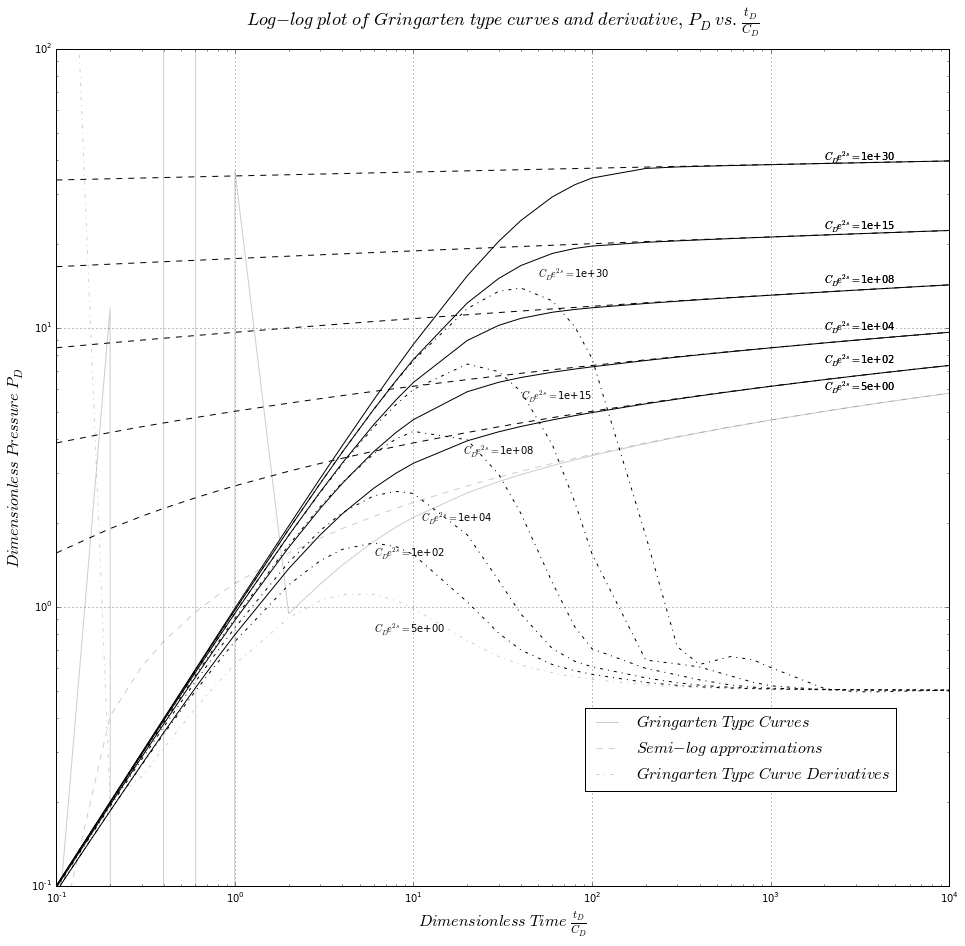

In [11]:
fig, ax = plt.subplots(figsize=(16,15))

ax.set_xscale('log', basex=10)
ax.set_yscale('log', basey=10)
ax.set_xlim(left=1e-1,right=10000.0)
ax.set_ylim(bottom=1e-1, top=1e2)

ax.set_title(r'$Log-log \ plot \ of \ Gringarten \ type \ curves \ and \ derivative, \ P_{D} \ vs. \ \frac{t_{D}}{C_{D}}$', fontsize=18, y=1.02)

ax.set_xlabel(r'$Dimensionless \ Time \ \frac{t_{D}}{C_{D}}$', fontsize=16)
ax.set_ylabel(r'$Dimensionless \ Pressure \ P_{D}$', fontsize=16)

for i, CD_e_skin, linest, desc, alpha in zip(range(1, len(CD_e_skins)+1), CD_e_skins, 
                                ['-', '-', '-', '-', '-', '-'], ['5', '1e+2', '1e+4', '1e+8', '1e+15','1e+30'],
                                [0.2, 1.0, 1.0, 1.0, 1.0, 1.0]):
    if i==1:
        ax.plot(inversion[:, 0], inversion[:, i], 
            color="black", linestyle=linest, label='$Gringarten \ Type \ Curves$', alpha=alpha)
    else:
        ax.plot(inversion[:, 0], inversion[:, i], color="black", linestyle=linest, alpha=alpha)
                
    plt.text(2000, inversion[-1, i]+0.1, r'$C_{D}e^{2s}=$'+'{:.0e}'.format(CD_e_skin), fontsize=10)
    
    plt.text(2000, inversion[-1, i]+0.1, r'$C_{D}e^{2s}=$'+'{:.0e}'.format(CD_e_skin), fontsize=10)
    if i==1:
        ax.plot(tD_CDs, 0.5*(np.log(tD_CDs)+0.80907+np.log(CD_e_skin)), color="black", label='$Semi-log \ approximations$',
                    linestyle='--', alpha=alpha)
    else:
        ax.plot(tD_CDs, 0.5*(np.log(tD_CDs)+0.80907+np.log(CD_e_skin)), color="black",
            linestyle='--')
for i, CD_e_skin, linest, desc, alpha in zip(range(1, len(CD_e_skins)+1), CD_e_skins, 
                                    ['-.', '-.', '-.', '-.', '-.', '-.'], ['5', '1e+2', '1e+4', '1e+8', '1e+15','1e+30'],
                                    [0.2, 1.0, 1.0, 1.0, 1.0, 1.0]):
    if i==1:
        ax.plot(grin_der_inversion[:, 0], grin_der_inversion[:, i], 
            color="black", linestyle=linest, label='$Gringarten \ Type \ Curve \ Derivatives$', alpha=alpha)
    else:
        ax.plot(grin_der_inversion[:, 0], grin_der_inversion[:, i], color="black", linestyle=linest, alpha=alpha)
        
plt.text(6, 0.8, r'$C_{D}e^{2s}=$'+'{:.0e}'.format(5), fontsize=10)
plt.text(6, 1.5, r'$C_{D}e^{2s}=$'+'{:.0e}'.format(100), fontsize=10)
plt.text(11, 2, r'$C_{D}e^{2s}=$'+'{:.0e}'.format(10000), fontsize=10)
plt.text(19, 3.5, r'$C_{D}e^{2s}=$'+'{:.0e}'.format(1e8), fontsize=10)
plt.text(40, 5.5, r'$C_{D}e^{2s}=$'+'{:.0e}'.format(1e15), fontsize=10)
plt.text(50, 15, r'$C_{D}e^{2s}=$'+'{:.0e}'.format(1e30), fontsize=10)

plt.grid()
legend = plt.legend(bbox_to_anchor=(0., 0.12, 0.95, .102), fontsize=16)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
plt.show()

##Comparison of computed type curves to provided solutions

According to Kappa Engineering literature on inversion of laplace transforms, an optimal set of parameters
to compute the inverse is given at N=16. We therefore increase the resolution and compute the inverse with lower numerical error.

In [12]:
actual_data = pd.read_excel("solution_ex4.xls", sheetname="Type curve data", header=0, skiprows=1)

In [13]:
val = 0.
exponents = [-1, 0, 1, 2, 3, 4, 5]
lowers = np.linspace(1, 10, 1000)[0:-1]
tD_CDs = []
for exponent in exponents:
    for lower in lowers:
        tD_CDs.append(float(str(lower)+'e'+str(exponent)))

CD_e_skins = [5, 1e2, 1e4, 1e8, 1e15, 1e30]

N = 16
N_index = 7

inversion = np.zeros((len(tD_CDs), len(CD_e_skins)+1))
inversion[:,0] = tD_CDs
for inv_index, CD_e_skin in enumerate(CD_e_skins):
    pD = []
    for k, tD_CD in enumerate(tD_CDs):
        val = 0.
        for i in range(N+1):
            val += stehfest_coeffs[i][N_index]*gringarten_type_curve(i+1, tD_CD, CD_e_skin)
        val *= np.log(2)*1/tD_CD
        inversion[k][inv_index+1] = val

In [14]:
val = 0.
exponents = [-1, 0, 1, 2, 3, 4, 5]
lowers = np.linspace(1, 10, 1000)[0:-1]
tD_CDs = []
for exponent in exponents:
    for lower in lowers:
        tD_CDs.append(float(str(lower)+'e'+str(exponent)))

CD_e_skins = [5, 1e2, 1e4, 1e8, 1e15, 1e30]

N = 16
N_index = 7

grin_der_inversion = np.zeros((len(tD_CDs), len(CD_e_skins)+1))
grin_der_inversion[:,0] = tD_CDs
for inv_index, CD_e_skin in enumerate(CD_e_skins):
    pD = []
    for k, tD_CD in enumerate(tD_CDs):
        val = 0.
        for i in range(N+1):
            val += stehfest_coeffs[i][N_index]*gringarten_type_curve_derivative(i+1, tD_CD, CD_e_skin)
        val *= np.log(2)*1/tD_CD
        grin_der_inversion[k][inv_index+1] = val
        
for i in range(len(CD_e_skins)):
    grin_der_inversion[:, i+1] = np.multiply(grin_der_inversion[:, 0], grin_der_inversion[:, i+1])

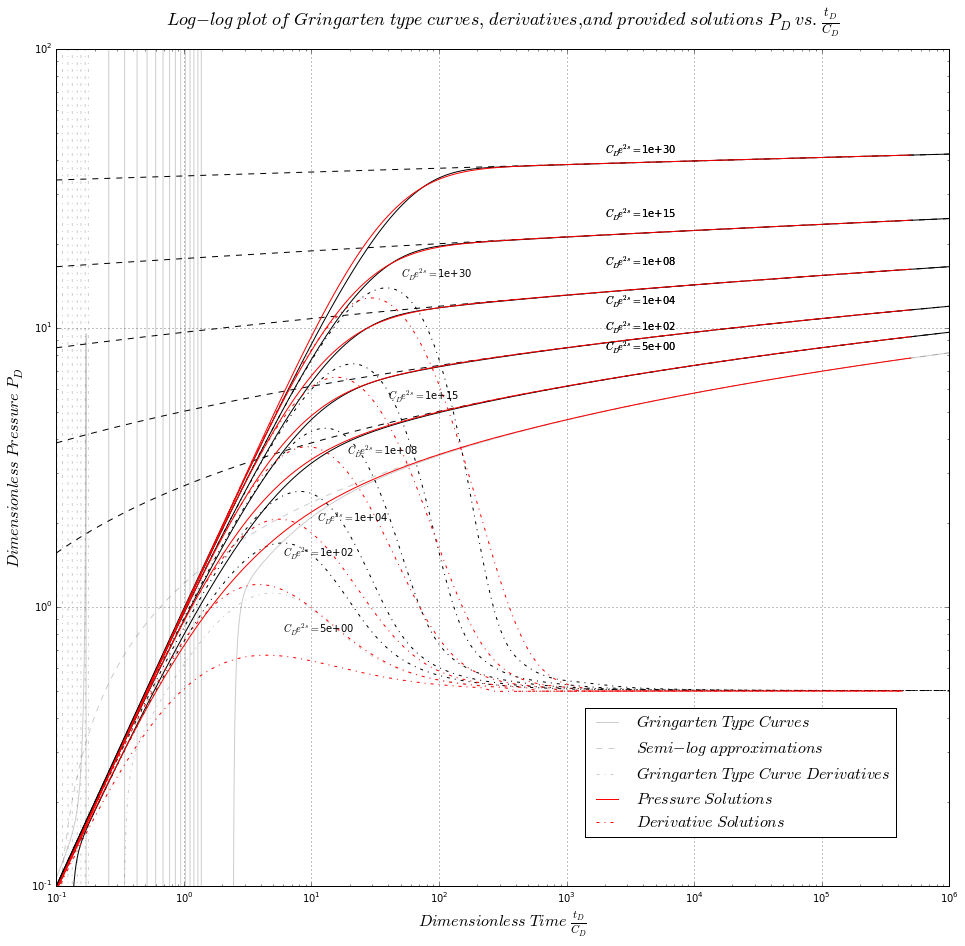

In [15]:
fig, ax = plt.subplots(figsize=(16,15))

ax.set_xscale('log', basex=10)
ax.set_yscale('log', basey=10)
ax.set_xlim(left=1e-1,right=1e6)
ax.set_ylim(bottom=1e-1, top=1e2)

ax.set_title(r'$Log-log \ plot \ of \ Gringarten \ type \ curves, \ derivatives,and \ provided \ solutions \ P_{D} \ vs. \ \frac{t_{D}}{C_{D}}$', fontsize=18, y=1.02)

ax.set_xlabel(r'$Dimensionless \ Time \ \frac{t_{D}}{C_{D}}$', fontsize=16)
ax.set_ylabel(r'$Dimensionless \ Pressure \ P_{D}$', fontsize=16)

for i, CD_e_skin, linest, desc, alpha in zip(range(1, len(CD_e_skins)+1), CD_e_skins, 
                                ['-', '-', '-', '-', '-', '-'], ['5', '1e+2', '1e+4', '1e+8', '1e+15','1e+30'],
                                [0.2, 1.0, 1.0, 1.0, 1.0, 1.0]):
    if i==1:
        ax.plot(inversion[:, 0], inversion[:, i], 
            color="black", linestyle=linest, label='$Gringarten \ Type \ Curves$', alpha=alpha)
    else:
        ax.plot(inversion[:, 0], inversion[:, i], color="black", linestyle=linest, alpha=alpha)
                
    plt.text(2000, inversion[-1, i]+0.1, r'$C_{D}e^{2s}=$'+'{:.0e}'.format(CD_e_skin), fontsize=10)
    
    plt.text(2000, inversion[-1, i]+0.1, r'$C_{D}e^{2s}=$'+'{:.0e}'.format(CD_e_skin), fontsize=10)
    if i==1:
        ax.plot(tD_CDs, 0.5*(np.log(tD_CDs)+0.80907+np.log(CD_e_skin)), color="black", label='$Semi-log \ approximations$',
                    linestyle='--', alpha=alpha)
    else:
        ax.plot(tD_CDs, 0.5*(np.log(tD_CDs)+0.80907+np.log(CD_e_skin)), color="black",
            linestyle='--')
for i, CD_e_skin, linest, desc, alpha in zip(range(1, len(CD_e_skins)+1), CD_e_skins, 
                                    ['-.', '-.', '-.', '-.', '-.', '-.'], ['5', '1e+2', '1e+4', '1e+8', '1e+15','1e+30'],
                                    [0.2, 1.0, 1.0, 1.0, 1.0, 1.0]):
    if i==1:
        ax.plot(grin_der_inversion[:, 0], grin_der_inversion[:, i], 
            color="black", linestyle=linest, label='$Gringarten \ Type \ Curve \ Derivatives$', alpha=alpha)
    else:
        ax.plot(grin_der_inversion[:, 0], grin_der_inversion[:, i], color="black", linestyle=linest, alpha=alpha)

        
for i in range(0, actual_data.shape[1], 3):
    if i == 0:
        ax.plot(actual_data.ix[:,i], actual_data.ix[:,i+1], linestyle="-", color="red", label=r'$Pressure \ Solutions$')
        ax.plot(actual_data.ix[:,i], actual_data.ix[:,i+2], linestyle="-.", color="red", label=r'$Derivative \  Solutions$')
    else:
        ax.plot(actual_data.ix[:,i], actual_data.ix[:,i+1], linestyle="-", color="red")
        ax.plot(actual_data.ix[:,i], actual_data.ix[:,i+2], linestyle="-.", color="red")
        
plt.text(6, 0.8, r'$C_{D}e^{2s}=$'+'{:.0e}'.format(5), fontsize=10)
plt.text(6, 1.5, r'$C_{D}e^{2s}=$'+'{:.0e}'.format(100), fontsize=10)
plt.text(11, 2, r'$C_{D}e^{2s}=$'+'{:.0e}'.format(10000), fontsize=10)
plt.text(19, 3.5, r'$C_{D}e^{2s}=$'+'{:.0e}'.format(1e8), fontsize=10)
plt.text(40, 5.5, r'$C_{D}e^{2s}=$'+'{:.0e}'.format(1e15), fontsize=10)
plt.text(50, 15, r'$C_{D}e^{2s}=$'+'{:.0e}'.format(1e30), fontsize=10)

plt.grid()
legend = plt.legend(bbox_to_anchor=(0., 0.12, 0.95, .102), fontsize=16)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
plt.show()

We observe a good match of the computed type curves(black) with the provided solution(red) at late times. This may be due to numerical imprecision of computation of the results provided from excel or due to numerical instability of methods implemented in the python libraries used to compute the bessel functions, logs, etc.